#### Import Pandas, Numpy, Seaborn, Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the csv

In [1]:
df = pd.read_csv('Data/Prostate_Cancer.csv')
df.head()

<IPython.core.display.Javascript object>

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


#### Check for null values

In [2]:
df.isna().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


#### Lets remove the 'id' column

In [4]:
df.drop('id',axis=1,inplace=True)

#### We only have one categorical column which is our target. 

#### So lets encode it

In [7]:
from sklearn.preprocessing import OneHotEncoder

df = pd.get_dummies(df,drop_first=True)

<IPython.core.display.Javascript object>

In [9]:
df.rename(columns={'diagnosis_result_M' : 'Cancer'},inplace=True)

#### Time for visualization

#### First separate the data into X and y

In [10]:
X = df.drop('Cancer',axis=1)
y = df.Cancer

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'radius'),
  Text(1, 0, 'texture'),
  Text(2, 0, 'perimeter'),
  Text(3, 0, 'area'),
  Text(4, 0, 'smoothness'),
  Text(5, 0, 'compactness'),
  Text(6, 0, 'symmetry'),
  Text(7, 0, 'fractal_dimension')])

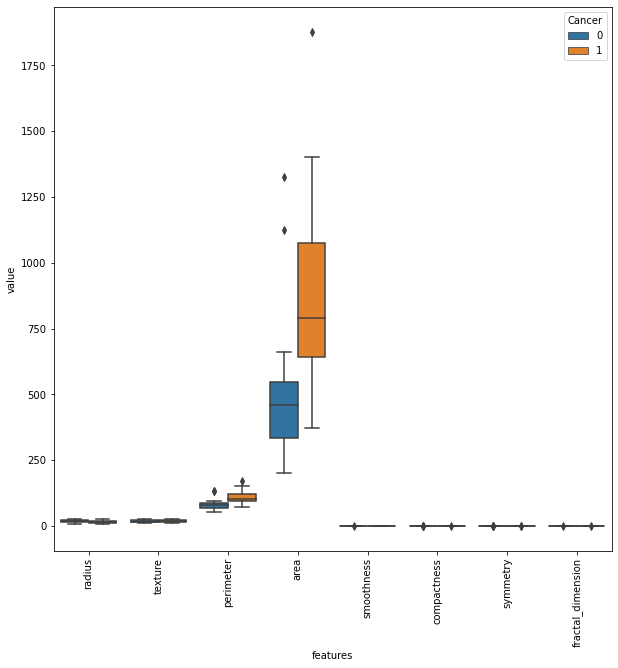

In [13]:
# data_dia = y
# data = X
# data_n_2 = (data - data.mean()) / (data.std())
# data = pd.concat([y,data_n_2],axis=1)
# data = pd.melt(df,id_vars="Cancer",
#                     var_name="features",
#                     value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Cancer", data=data)
plt.xticks(rotation=90)

<IPython.core.display.Javascript object>

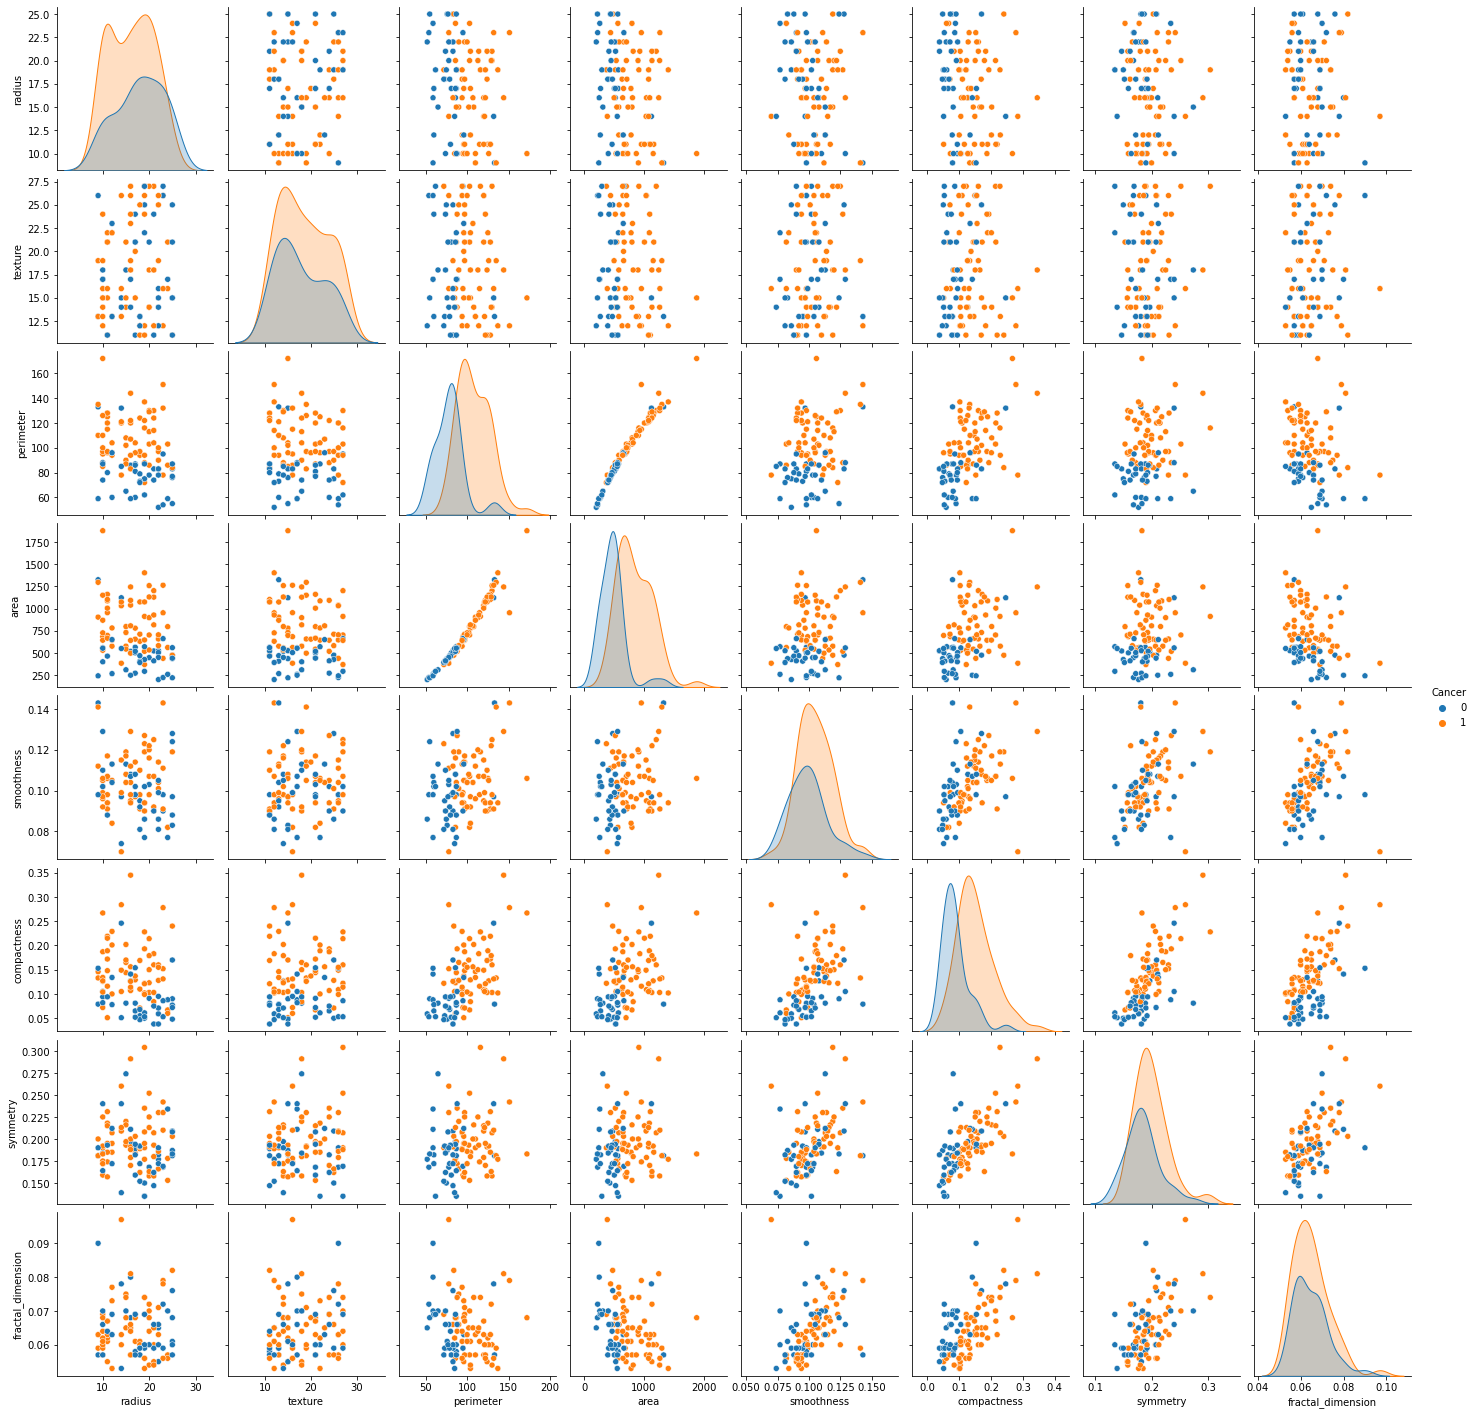

In [14]:
sns.pairplot(df,hue='Cancer')

#### Check the correlations between variables

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

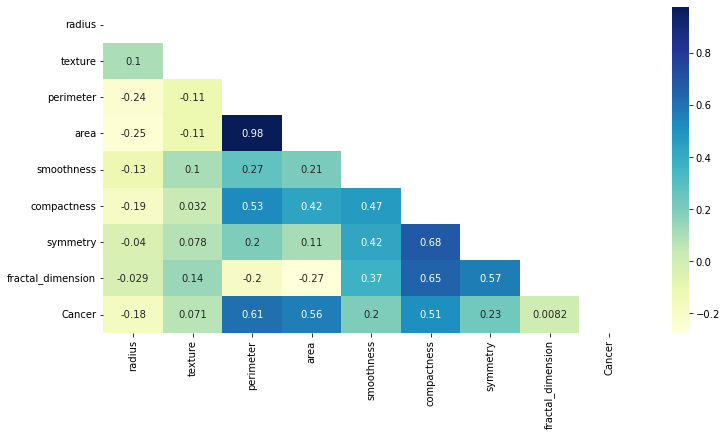

In [15]:
plt.figure(figsize=(12,6))
mask=np.triu(df.corr())

sns.heatmap(df.corr(),annot=True,mask=mask,cmap="YlGnBu")
plt.show()

#### Check for imbalance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

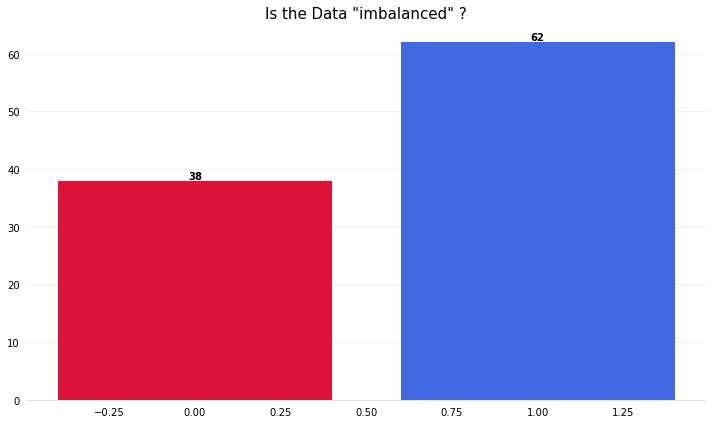

In [19]:
# A=df['Cancer'].value_counts().reset_index()

fig,ax=plt.subplots(figsize=(10,6))
bars = ax.bar(data=A,x='index',height='Cancer',color=['royalblue','crimson'],label=[0,1])
ax.tick_params(bottom=False,left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.3,
        round(bar.get_height(), 1),
        color='black',
        horizontalalignment='center',
        weight='bold'
  )
plt.title('Is the Data "imbalanced" ?',fontsize=15)

fig.tight_layout()

In [20]:
df['Cancer'].value_counts()

1    62
0    38
Name: Cancer, dtype: int64

#### Lets fix the imbalance

In [21]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN(sampling_strategy='all')
X_sm,y_sm =sm.fit_resample(X,y)

In [22]:
from collections import Counter

print(Counter(y_sm))
print(Counter(y))

Counter({0: 34, 1: 26})
Counter({1: 62, 0: 38})


#### Train-Test-Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=42)

#### Lets build some models

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
random_state = 42


model1 = DecisionTreeClassifier(random_state=random_state)
model2 = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=random_state))
model3 = RandomForestClassifier(n_estimators=20,random_state=random_state)
model4 = GradientBoostingClassifier(random_state=random_state)
model5 = LogisticRegression(random_state=random_state, solver='lbfgs', max_iter=10000)
model6 = XGBClassifier(random_state = random_state)
model7 = SVC(random_state=random_state)
model8 = KNeighborsClassifier()
model9 = GaussianNB()



def make_classification(X_train, X_test, y_train, y_test):
    accuracy, f1,crossvalscore = [], [],[]

    

    ##classifiers
    classifiers = []
    classifiers.append(model1)
    classifiers.append(model2)
    classifiers.append(model3)
    classifiers.append(model4)
    classifiers.append(model5)
    classifiers.append(model6)
    classifiers.append(model7)
    classifiers.append(model8)
    classifiers.append(model9)

    for classifier in classifiers:
        # classifier and fitting
        clf = classifier
        clf.fit(X_train, y_train)

        # predictions
        y_preds = clf.predict(X_test)

        # metrics
        accuracy.append(((accuracy_score(y_test, y_preds))) * 100)
        f1.append(((f1_score(y_test, y_preds))) * 100)
        crossvalscore.append(np.mean(cross_val_score(clf,X_sm,y_sm,cv=5)))
        

    results_df = pd.DataFrame({"Accuracy Score": accuracy,
                               "f1 Score": f1,
                               'Cross_val_score':crossvalscore,
                               "ML Models": ["DecisionTree", "AdaBoost",
                                             "RandomForest", "GradientBoosting",
                                             "Logistic reg",'XGB',
                                             "SVC", "KNN","GNB"]})

    results = (results_df.sort_values(by=['Cross_val_score'], ascending=False)
               .reset_index(drop=True))

    return classifiers, results


classifiers, results = make_classification(X_train, X_test, y_train, y_test)

results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Accuracy Score,f1 Score,Cross_val_score,ML Models
0,100.0,100.0,1.0,DecisionTree
1,100.0,100.0,1.0,AdaBoost
2,100.0,100.0,1.0,RandomForest
3,100.0,100.0,1.0,GradientBoosting
4,100.0,100.0,1.0,Logistic reg
5,100.0,100.0,1.0,XGB
6,100.0,100.0,1.0,SVC
7,100.0,100.0,1.0,KNN
8,100.0,100.0,1.0,GNB


#### Lets see the classification report

In [26]:
y_pred1 = model1.predict(X_test)
y_pred6 = model6.predict(X_test)

from sklearn.metrics import classification_report
print('Report for Decision Tree:')
print(classification_report(y_test,y_pred1))
print('Report for SVC:')
print(classification_report(y_test,y_pred6))

Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Report for SVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [27]:
import pickle

pickle.dump(model1, open('ProstateDecisionTree.pkl','wb'))
pickle.dump(model6, open('ProstateSVC.pkl','wb'))  